In [1]:
import pandas as pd

url = "https://www2.census.gov/programs-surveys/demo/tables/health-insurance/time-series/acs/hic04_acs.xlsx"

df = pd.read_excel(url, skiprows=3, skipfooter=5,
                   index_col=[0, 1], header=[0,1])


In [4]:
pd.set_option('display.max_columns', None)
df.head(12)

Coverage                            2019                          \
                                Estimate Margin of error Percent   
United States Total               323121              18   100.0   
              Any coverage        293482             210    90.8   
              Uninsured            29639             210     9.2   
              Private             217812             446    67.4   
              ..Employer-based    178919             404    55.4   
              ..Direct-purchase    42302             179    13.1   
              ..TRICARE             8782              88     2.7   
              Public              114315             222    35.4   
              ..Medicaid           64077             247    19.8   
              ..Medicare           58327              59    18.1   
              ..VA Care             7247              57     2.2   
Alabama       Total                 4823               2   100.0   

Coverage                                              2018                  \
                                Margin of error.1 Estimate Margin of error   
United States Total                             0   322249              15   
              Any coverage                    0.1   293684             178   
              Uninsured                       0.1    28566             183   
              Private                         0.1   217623             404   
              ..Employer-based                0.1   177740             354   
              ..Direct-purchase               0.1    43191             184   
              ..TRICARE                         Z     8767              79   
              Public                          0.1   114750             205   
              ..Medicaid                      0.1    65965             234   
              ..Medicare                        Z    56869              63   
              ..VA Care                         Z     7477              44   
Alabama       Total                             0     4810               2   

Coverage                                                      2017  \
                                Percent Margin of error.1 Estimate   
United States Total               100.0                 0   320775   
              Any coverage         91.1               0.1   292756   
              Uninsured             8.9               0.1    28019   
              Private              67.5               0.1   216952   
              ..Employer-based     55.2               0.1   176319   
              ..Direct-purchase    13.4               0.1    43406   
              ..TRICARE             2.7                 Z     8640   
              Public               35.6               0.1   113720   
              ..Medicaid           20.5               0.1    66131   
              ..Medicare           17.6                 Z    55473   
              ..VA Care             2.3                 Z     7290   
Alabama       Total               100.0                 0     4794   

Coverage                                                                   \
                                Margin of error Percent Margin of error.1   
United States Total                          15   100.0                 0   
              Any coverage                  184    91.3               0.1   
              Uninsured                     188     8.7               0.1   
              Private                       419    67.6               0.1   
              ..Employer-based              358    55.0               0.1   
              ..Direct-purchase             189    13.5               0.1   
              ..TRICARE                      79     2.7                 Z   
              Public                        218    35.5               0.1   
              ..Medicaid                    236    20.6               0.1   
              ..Medicare                     60    17.3                 Z   
              ..VA Care                      53  

In [7]:
#function to get yearly data for any coverage type for any state by year

def transpose_coverage_yearly(df, state, coverage=None):
    new_df = df.loc[state, df.columns.get_level_values(1)=='Estimate']
    new_df.columns = new_df.columns.droplevel(1)
    new_df = new_df.T
    if coverage:
        new_df = new_df.loc[:,coverage]
    return new_df

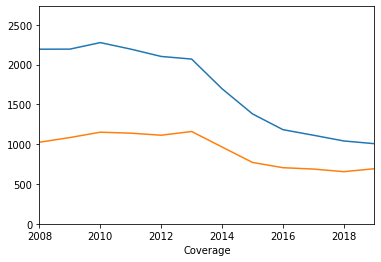

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

NY_unins = transpose_coverage_yearly(df, 'New York', 'Uninsured')
NJ_unins = transpose_coverage_yearly(df, 'New Jersey', 'Uninsured')
NY_unins.plot(kind='line')
NJ_unins.plot(kind='line')

plt.axis([2008,2019,0,NY_unins.max() * 1.2])
plt.show()

In [12]:
NY_unins

Coverage
2019    1007
2018    1041
2017    1113
2016    1183
2015    1381
2014    1697
2013    2070
2012    2103
2011    2195
2010    2277
2009    2195
2008    2194
Name: Uninsured, dtype: int64

In [13]:
NY_total = transpose_coverage_yearly(df, 'New York', 'Total')

In [14]:
NY_total

Coverage
2019    19213
2018    19303
2017    19608
2016    19506
2015    19556
2014    19500
2013    19400
2012    19317
2011    19208
2010    19134
2009    19264
2008    19206
Name: Total, dtype: int64

In [15]:
NY_unins_as_pct = NY_unins / NY_total

In [16]:
NY_unins_as_pct

Coverage
2019    0.052412
2018    0.053929
2017    0.056763
2016    0.060648
2015    0.070618
2014    0.087026
2013    0.106701
2012    0.108868
2011    0.114275
2010    0.119003
2009    0.113943
2008    0.114235
dtype: float64

In [19]:
#function that outputs series of uninsured by percentage by year
def unins_as_pct_series(df, state):
    unins_df = transpose_coverage_yearly(df, state, 'Uninsured')
    total_df = transpose_coverage_yearly(df, state, 'Total')
    return (unins_df / total_df) * 100

In [20]:
unins_as_pct_series(df, 'New York')

Coverage
2019     5.241243
2018     5.392944
2017     5.676255
2016     6.064801
2015     7.061771
2014     8.702564
2013    10.670103
2012    10.886784
2011    11.427530
2010    11.900282
2009    11.394311
2008    11.423513
dtype: float64

In [41]:
states = set()
for data in df.iterrows():
    states.add(data[0][0])

states = list(states)

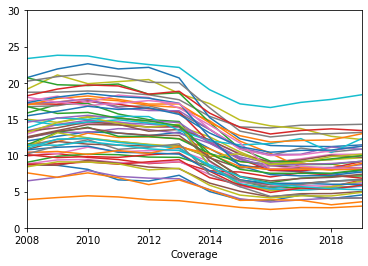

In [44]:
for state in states:
    unins_as_pct_series(df, state).plot(kind='line')
    
plt.axis([2008, 2019, 0, 30])
plt.show()